# Dump hdf5 input files with RAIL utils

- creation date : March 18th 2021

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
import scipy.stats
import sys
import os
import pandas as pd
#sys.path.append('../')
import h5py
#from delight.io import *
#from delight.utils import *
#from delight.photoz_gp import PhotozGP

#from rail.estimation.utils import load_training_data, get_input_data_size_hdf5

from interfaces.rail.utils  import load_training_data, get_input_data_size_hdf5,load_raw_hdf5_data

In [68]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [69]:
files = ["training_100gal.hdf5","validation_10gal.hdf5","test_dc2_training_9816.hdf5","test_dc2_validation_9816.hdf5"]

In [70]:
!ls

DumpDelightFiles.ipynb		      no_groupname_test.hdf5
Dumphdf5InputFiles.ipynb	      test_dc2_training_9816.hdf5
Dumphdf5InputFileswithRAIL.ipynb      test_dc2_validation_9816.hdf5
README.md			      tmp
calibrateTemplateMixturePriors.ipynb  training_100gal.hdf5
calibrateTemplatePriors.ipynb	      validation_10gal.hdf5
compareFluxRedshiftDataModel.ipynb


# Read hdf5 file with rail utils

In [71]:
index=3
filename = files[index] 


In [72]:
f=load_raw_hdf5_data(filename , groupname='photometry')

## Utility Functions

- conversion format
- selection

In [73]:
def group_entries(f):
    """
    group entries in single numpy array
    
    """
    galid = f['id'][()][:,np.newaxis]
    redshift = f['redshift'][()][:,np.newaxis]
    mag_err_g_lsst = f['mag_err_g_lsst'][()][:,np.newaxis]
    mag_err_i_lsst = f['mag_err_i_lsst'][()][:,np.newaxis]
    mag_err_r_lsst = f['mag_err_r_lsst'][()][:,np.newaxis]
    mag_err_u_lsst = f['mag_err_u_lsst'][()][:,np.newaxis]
    mag_err_y_lsst = f['mag_err_y_lsst'][()][:,np.newaxis]
    mag_err_z_lsst = f['mag_err_z_lsst'][()][:,np.newaxis]
    mag_g_lsst = f['mag_g_lsst'][()][:,np.newaxis]
    mag_i_lsst = f['mag_i_lsst'][()][:,np.newaxis]
    mag_r_lsst = f['mag_r_lsst'][()][:,np.newaxis]
    mag_u_lsst = f['mag_u_lsst'][()][:,np.newaxis]
    mag_y_lsst = f['mag_y_lsst'][()][:,np.newaxis]
    mag_z_lsst = f['mag_z_lsst'][()][:,np.newaxis]
    
    full_arr=np.hstack(( galid,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,\
                       mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst))
    return full_arr

    

In [74]:
def filter_mag_entries(d):
    """
    Filter accoding magnitudes
    """
    
    u=d[:,2]
    
    idx_u= np.where(u>31.8)[0]  
    #d_del=np.delete(d,idx_u,axis=0)
    
    return np.array(idx_u)

In [75]:
def mag_to_flux(d):
    """
    
    Convert magnitudes to fluxes

    :param d:
    :return:
    """

    nb=6
    fluxes=np.zeros_like(d)
   

    fluxes[:,0]=d[:,0]
    fluxes[:,1]=d[:,1]
    
    for idx in np.arange(6):
        fluxes[:,2+idx]=np.power(10,-0.4*d[:,2+idx])
        fluxes[:,8+idx]=fluxes[:,2+idx]*d[:,8+idx]
    return fluxes

In [76]:
def filter_fluxes_entries(d,nsig=5):
    """
    """
    
    
    nb=6
    
    indexes=[]
    indexes=np.array(indexes,dtype=np.int)
    
    for idx in np.arange(6):
        ratio=d[:,2+idx]/d[:,8+idx]  # flux divided by sigma-flux
        bad_indexes=np.where(ratio<nsig)[0]
        indexes=np.concatenate((indexes,bad_indexes))
        
    indexes=np.unique(indexes)
    return np.sort(indexes)
    
    
    
    

# Work

## Convert magnitudes in a numpy array

In [77]:
# produce a numpy array
data=group_entries(f)
data.shape

(20449, 14)

## Selection according magnitudes

In [78]:
#
indexes=filter_mag_entries(data)
indexes.shape

(1503,)

In [79]:
data_f=np.delete(data,indexes,axis=0)

In [80]:
data_f.shape

(18946, 14)

## Convert to fluxes

In [81]:
fdata=mag_to_flux(data_f)

## Selection on fluxes

In [82]:
indexes_bad=filter_fluxes_entries(fdata,nsig=5)

In [83]:
data_f=np.delete(data_f,indexes_bad,axis=0)
fdata=np.delete(fdata,indexes_bad,axis=0)

In [84]:
len(data_f)

7552

In [85]:
len(fdata)

7552

# Plot

In [86]:
gid=data_f[:,0]
rs=data_f[:,1]
u=data_f[:,2]
g=data_f[:,3]
r=data_f[:,4]
i=data_f[:,5]
z=data_f[:,6]
y=data_f[:,7]
eu=data_f[:,8]
eg=data_f[:,9]
er=data_f[:,10]
ei=data_f[:,11]
ez=data_f[:,12]
ey=data_f[:,13]

Text(0.5, 1.0, 'redshift')

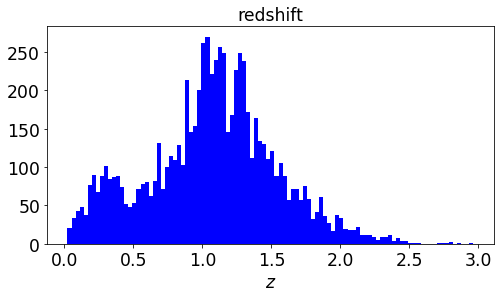

In [87]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(111)
ax.hist(rs,bins=100,facecolor="b");
ax.set_xlabel("$z$")
ax.set_title("redshift")

Text(0.5, 0.98, 'magnitude u')

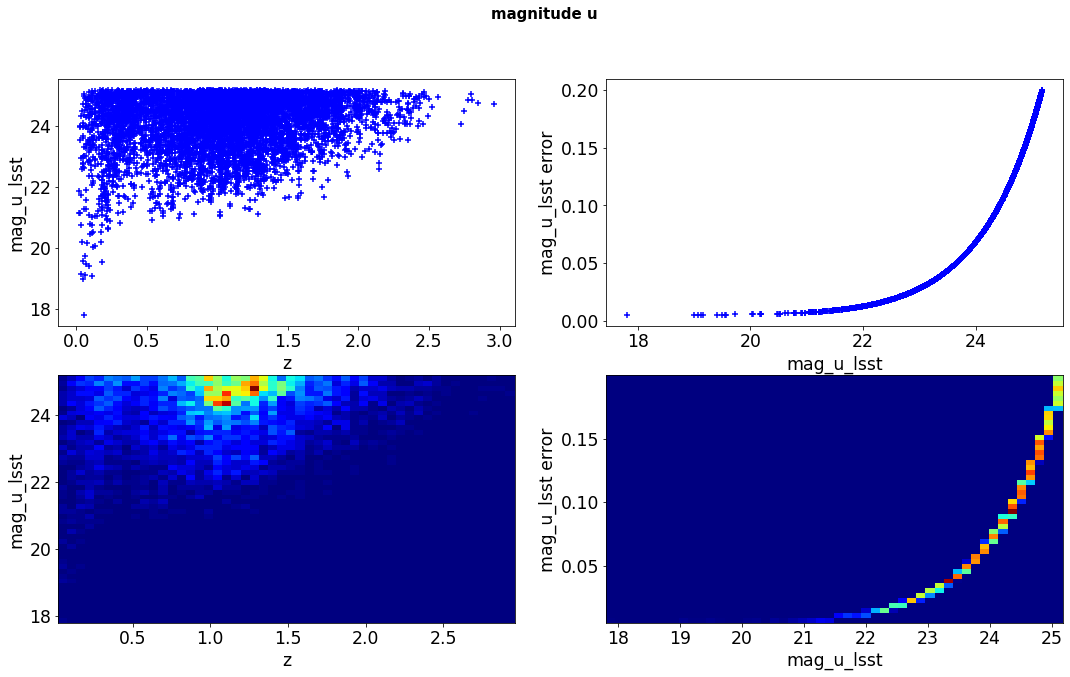

In [88]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,u,marker="+",color="b")
#ax.set_ylim(15,35)
ax.set_xlabel("z")
ax.set_ylabel("mag_u_lsst")
ax=fig.add_subplot(222)
ax.scatter(u,eu,marker="+",color="b")
#ax.set_xlim(15,35)
ax.set_xlabel("mag_u_lsst")
ax.set_ylabel("mag_u_lsst error")
plt.suptitle("magnitude u",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,u,(50,50),cmap="jet")
#ax.set_ylim(15,35)
ax.set_xlabel("z")
ax.set_ylabel("mag_u_lsst")
ax=fig.add_subplot(224)
ax.hist2d(u,eu,(50,50),cmap="jet")
#ax.set_xlim(15,35)
ax.set_xlabel("mag_u_lsst")
ax.set_ylabel("mag_u_lsst error")
plt.suptitle("magnitude u",fontweight='bold',fontsize=15)

Text(0.5, 0.98, 'magnitude g')

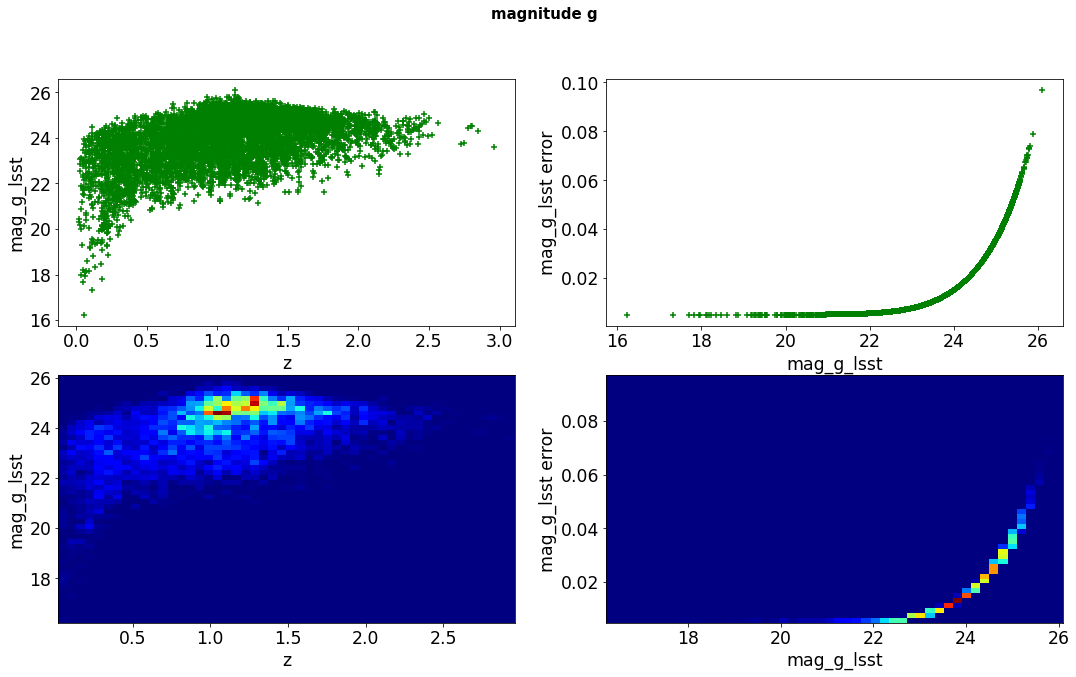

In [89]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,g,marker="+",color="g")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_g_lsst")
ax=fig.add_subplot(222)
ax.scatter(g,eg,marker="+",color="g")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_g_lsst")
ax.set_ylabel("mag_g_lsst error")
plt.suptitle("magnitude g",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,g,(50,50),cmap="jet")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_g_lsst")
ax=fig.add_subplot(224)
ax.hist2d(g,eg,(50,50),cmap="jet")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_g_lsst")
ax.set_ylabel("mag_g_lsst error")
plt.suptitle("magnitude g",fontweight='bold',fontsize=15)

Text(0.5, 0.98, 'magnitude r')

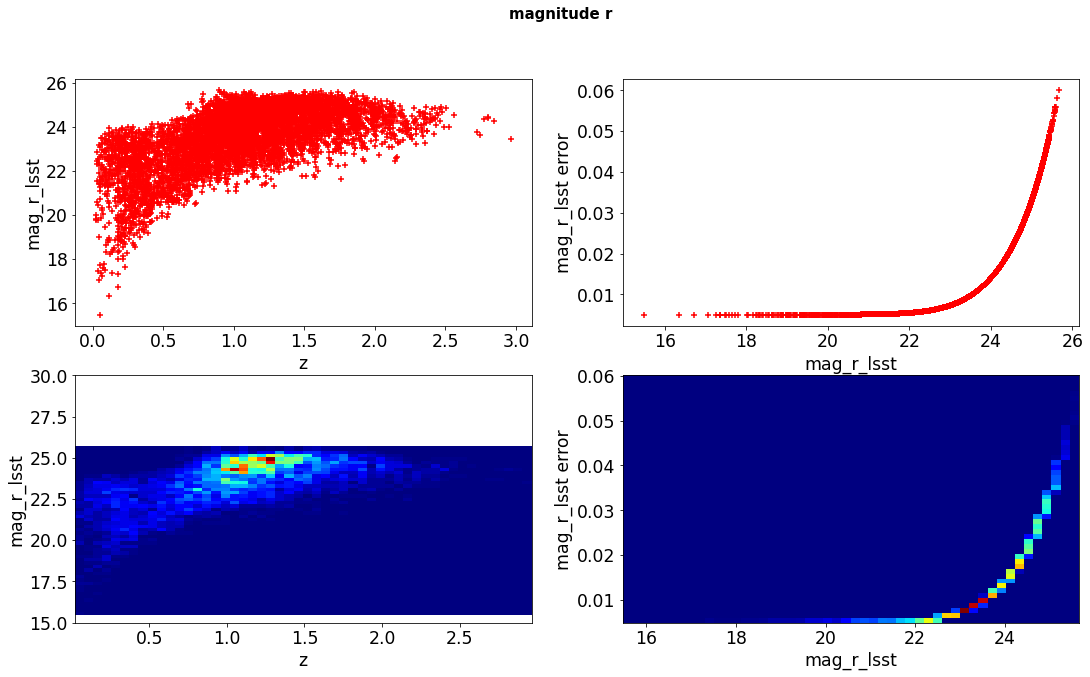

In [90]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,r,marker="+",color="r")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_r_lsst")
ax=fig.add_subplot(222)
ax.scatter(r,er,marker="+",color="r")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_r_lsst")
ax.set_ylabel("mag_r_lsst error")
plt.suptitle("magnitude r",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,r,(50,50),cmap="jet")
ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_r_lsst")
ax=fig.add_subplot(224)
ax.hist2d(r,er,(50,50),cmap="jet")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_r_lsst")
ax.set_ylabel("mag_r_lsst error")
plt.suptitle("magnitude r",fontweight='bold',fontsize=15)

Text(0.5, 0.98, 'magnitude i')

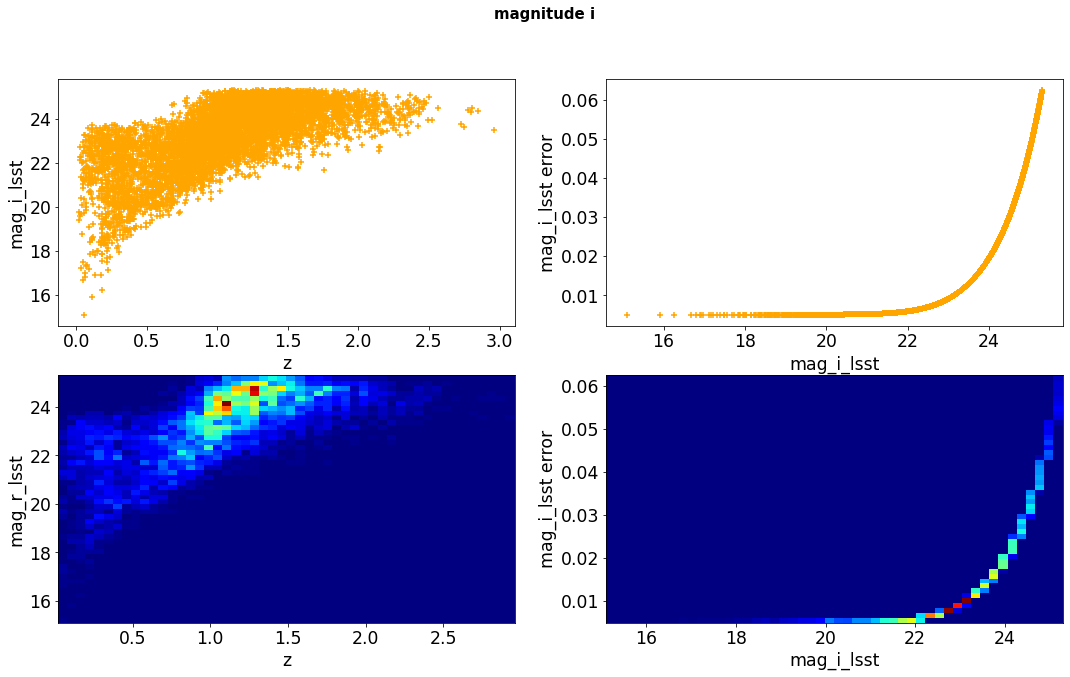

In [91]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,i,marker="+",color="orange")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_i_lsst")
ax=fig.add_subplot(222)
ax.scatter(i,ei,marker="+",color="orange")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_i_lsst")
ax.set_ylabel("mag_i_lsst error")
plt.suptitle("magnitude i",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,i,(50,50),cmap="jet")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_r_lsst")
ax=fig.add_subplot(224)
ax.hist2d(i,ei,(50,50),cmap="jet")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_i_lsst")
ax.set_ylabel("mag_i_lsst error")
plt.suptitle("magnitude i",fontweight='bold',fontsize=15)

Text(0.5, 0.98, 'magnitude z')

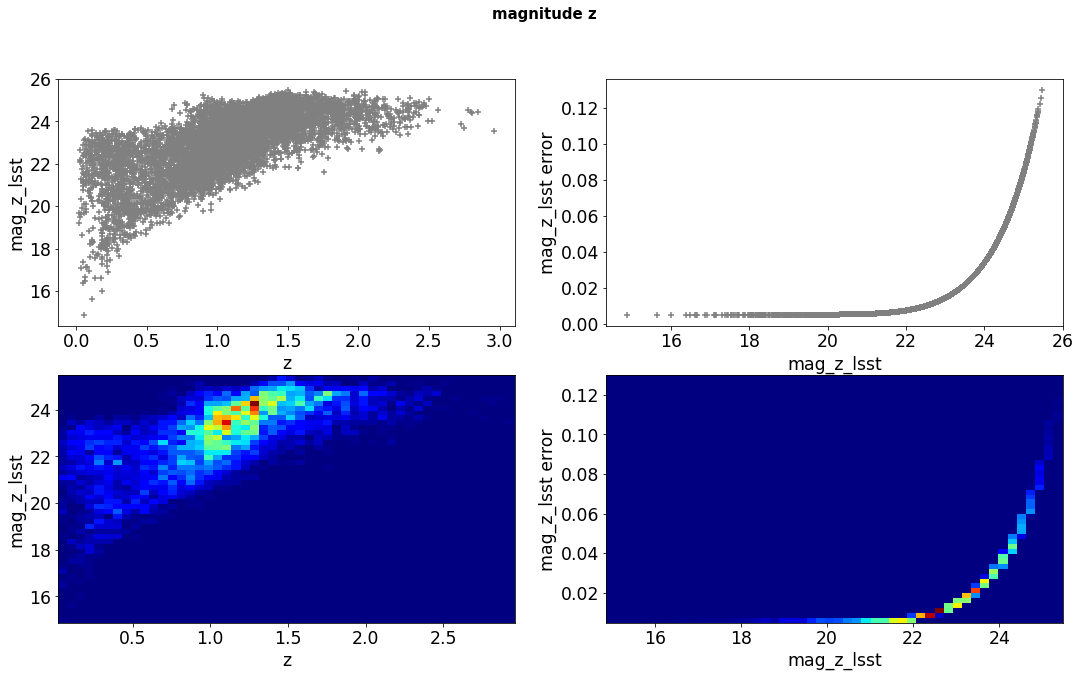

In [92]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,z,marker="+",color="grey")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_z_lsst")
ax=fig.add_subplot(222)
ax.scatter(z,ez,marker="+",color="grey")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_z_lsst")
ax.set_ylabel("mag_z_lsst error")
plt.suptitle("magnitude z",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,z,(50,50),cmap="jet")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_z_lsst")
ax=fig.add_subplot(224)
ax.hist2d(z,ez,(50,50),cmap="jet")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_z_lsst")
ax.set_ylabel("mag_z_lsst error")
plt.suptitle("magnitude z",fontweight='bold',fontsize=15)

Text(0.5, 0.98, 'magnitude y')

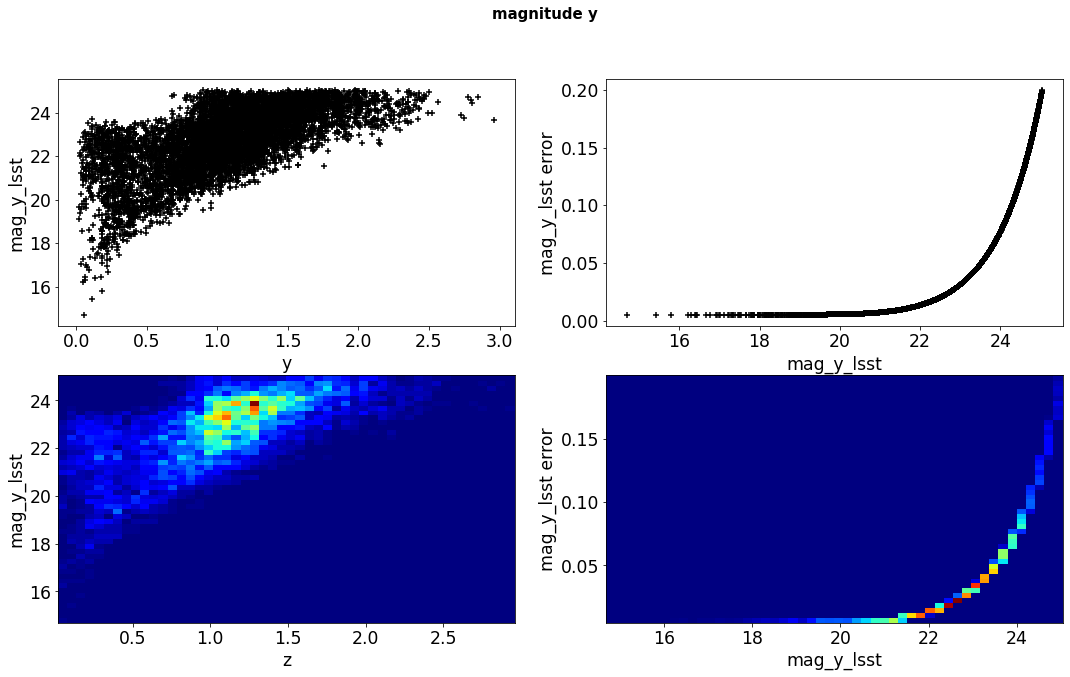

In [93]:
fig=plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)
ax.scatter(rs,y,marker="+",color="k")
#ax.set_ylim(15,30)
ax.set_xlabel("y")
ax.set_ylabel("mag_y_lsst")
ax=fig.add_subplot(222)
ax.scatter(y,ey,marker="+",color="k")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_y_lsst")
ax.set_ylabel("mag_y_lsst error")
plt.suptitle("magnitude y",fontweight='bold',fontsize=15)

ax=fig.add_subplot(223)
ax.hist2d(rs,y,(50,50),cmap="jet")
#ax.set_ylim(15,30)
ax.set_xlabel("z")
ax.set_ylabel("mag_y_lsst")
ax=fig.add_subplot(224)
ax.hist2d(y,ey,(50,50),cmap="jet")
#ax.set_xlim(15,30)
ax.set_xlabel("mag_y_lsst")
ax.set_ylabel("mag_y_lsst error")
plt.suptitle("magnitude y",fontweight='bold',fontsize=15)

# Convert to flux

In [94]:
redshift=rs

In [95]:
flux_g_lsst=np.power(10,-0.4*g)
flux_i_lsst=np.power(10,-0.4*i)
flux_r_lsst=np.power(10,-0.4*r)
flux_u_lsst=np.power(10,-0.4*u)
flux_y_lsst=np.power(10,-0.4*y)
flux_z_lsst=np.power(10,-0.4*z)

In [96]:
flux_err_u = eu*flux_u_lsst
flux_err_g = eg*flux_g_lsst
flux_err_r = er*flux_r_lsst
flux_err_i = ei*flux_i_lsst
flux_err_z = ez*flux_z_lsst
flux_err_y = ey*flux_y_lsst

In [97]:
redshift=fdata[:,1]
flux_u_lsst=fdata[:,2]
flux_g_lsst=fdata[:,3]
flux_r_lsst=fdata[:,4]
flux_i_lsst=fdata[:,5]
flux_z_lsst=fdata[:,6]
flux_y_lsst=fdata[:,7]

flux_err_u=fdata[:,8] 
flux_err_g=fdata[:,9] 
flux_err_r=fdata[:,10] 
flux_err_i=fdata[:,11]
flux_err_z=fdata[:,12]
flux_err_y=fdata[:,13]

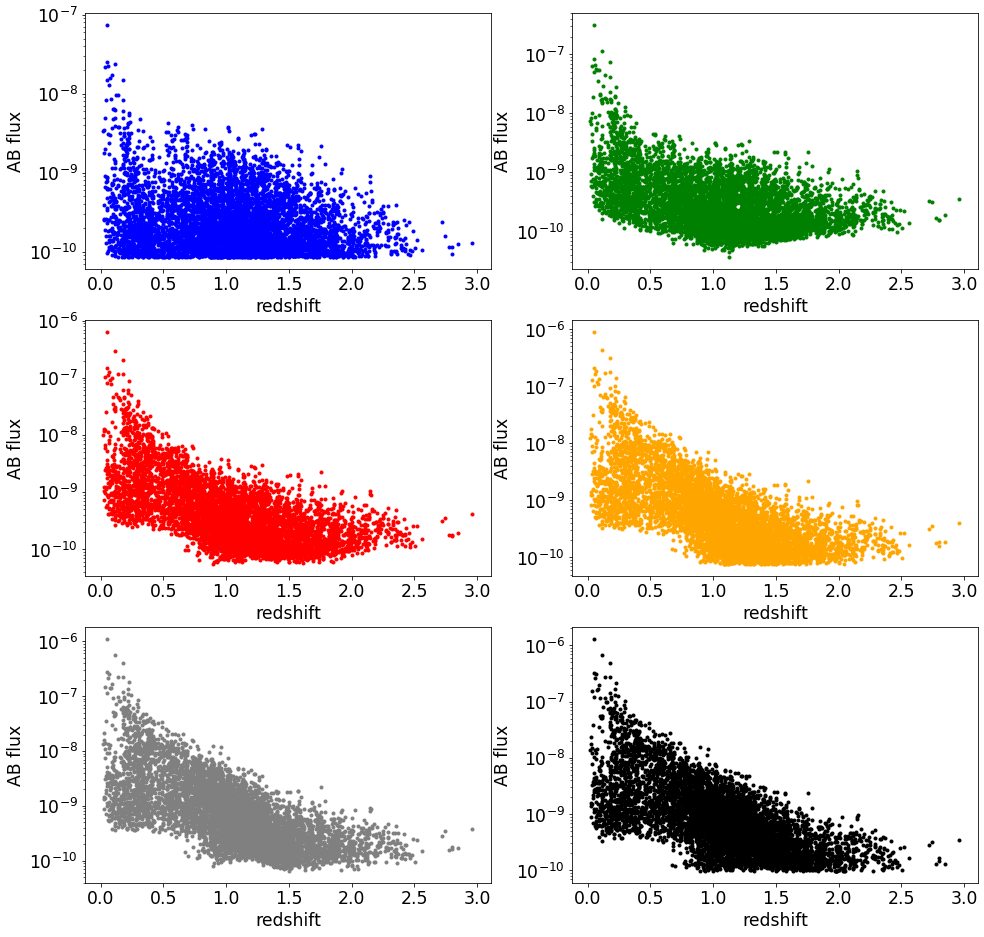

In [98]:
ncol=2
nrow=3
fig, axes = plt.subplots(nrow, ncol,figsize=(16,16)) 

for ifilt in np.arange(6):
    ix=ifilt//3
    iy=ifilt-ix*3
    
    if ifilt==0:
        axes[0,0].scatter(redshift,flux_u_lsst,marker=".",label="band u",color="b")
    elif ifilt==1:
        axes[0,1].scatter(redshift,flux_g_lsst,marker=".",label="band g",color="g")
    elif ifilt==2:
        axes[1,0].scatter(redshift,flux_r_lsst,marker=".",label="band r",color="r")
    elif ifilt==3:
        axes[1,1].scatter(redshift,flux_i_lsst,marker=".",label="band i",color="orange")
    elif ifilt==4:
        axes[2,0].scatter(redshift,flux_z_lsst,marker=".",label="band z",color="grey")
    elif ifilt==5:
        axes[2,1].scatter(redshift,flux_y_lsst,marker=".",label="band y",color="k")
        
    axes[iy,ix].set_yscale("log")
    axes[iy,ix].set_xlabel("redshift")
    axes[iy,ix].set_ylabel("AB flux")
     
        
        

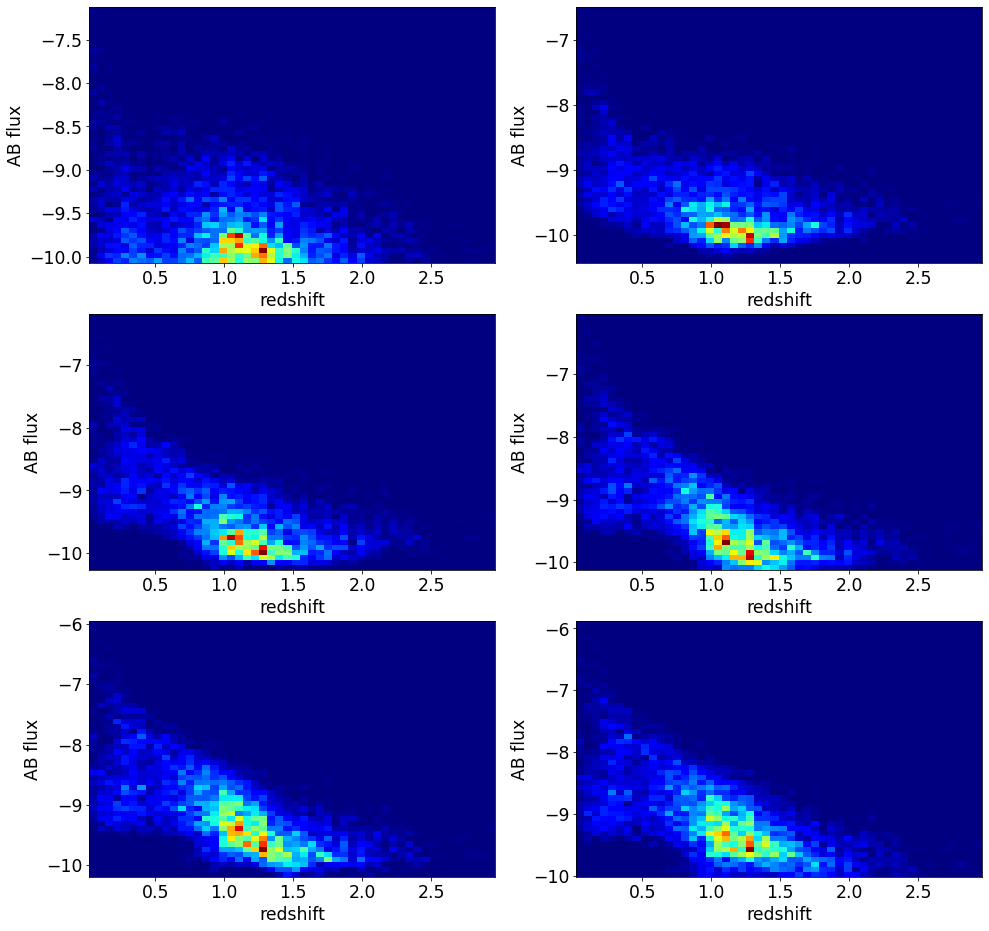

In [99]:
ncol=2
nrow=3
fig, axes = plt.subplots(nrow, ncol,figsize=(16,16)) 

for ifilt in np.arange(6):
    ix=ifilt//3
    iy=ifilt-ix*3
    
    if ifilt==0:
        axes[0,0].hist2d(redshift,np.log10(flux_u_lsst),(50,50),label="band u",cmap="jet")
    elif ifilt==1:
        axes[0,1].hist2d(redshift,np.log10(flux_g_lsst),(50,50),label="band g",cmap="jet")
    elif ifilt==2:
        axes[1,0].hist2d(redshift,np.log10(flux_r_lsst),(50,50),label="band r",cmap="jet")
    elif ifilt==3:
        axes[1,1].hist2d(redshift,np.log10(flux_i_lsst),(50,50),label="band i",cmap="jet")
    elif ifilt==4:
        axes[2,0].hist2d(redshift,np.log10(flux_z_lsst),(50,50),label="band z",cmap="jet")
    elif ifilt==5:
        axes[2,1].hist2d(redshift,np.log10(flux_y_lsst),(50,50),label="band y",cmap="jet")
        
    
    axes[iy,ix].set_xlabel("redshift")
    axes[iy,ix].set_ylabel("AB flux")
     
        